# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.utils import requote_uri

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
#Save config Information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

url = base_url + f"appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# counter for City Index
count=1 
# Counter for number of sets to be created
sets =1 

#Intializing the lists to hold values
max_temp = []
city_name = []
city_lat = []
city_lng = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
country = []
city_date = []

print("Beginning Data Retrieval\n -----------------------------")

for city in cities:
    
    # Build Final query URL 
    final_url = requote_uri(f"{url}{city}") 
    

    #Make API calls to each city
    response = requests.get(final_url).json()
    print(final_url)

    print(f'Processing Record {count} of Set {sets} | {city}')

    #Since some data may be missing , use try-except to skip any that are missing a data point.
    try:       
        #Fetching 'weather data' from the 'json resonse' 
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_cloudiness.append(response['clouds']['all'])
        city_windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])                      
        
    except KeyError:
        print("City not found. Skipping...")
            
    count+=1  #increment city index after missing cities
    
    #Set counter for number of sets to return
    if count % 50 == 0:
        sets+=1
        
#Printing end of processing
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')   

Beginning Data Retrieval
 -----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kapaa
Processing Record 1 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=urozhaynoye
Processing Record 2 of Set 1 | urozhaynoye
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=ushuaia
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=gravelbourg
Processing Record 4 of Set 1 | gravelbourg
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=porto%20walter
Processing Record 5 of Set 1 | porto walter
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=amderma
Processing Record 6 of Set 1 | amderma
City not found. Skip

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=san%20rafael%20del%20sur
Processing Record 54 of Set 2 | san rafael del sur
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=storforshei
Processing Record 55 of Set 2 | storforshei
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=qaanaaq
Processing Record 56 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=gurgan
Processing Record 57 of Set 2 | gurgan
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=arraial%20do%20cabo
Processing Record 58 of Set 2 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=half%20moon%20bay
Processing Record 59 of Set 2 | half moon 

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=faranah
Processing Record 107 of Set 3 | faranah
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=illoqqortoormiut
Processing Record 108 of Set 3 | illoqqortoormiut
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=cabo%20san%20lucas
Processing Record 109 of Set 3 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=amsterdam
Processing Record 110 of Set 3 | amsterdam
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=klaksvik
Processing Record 111 of Set 3 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kargopol
Processing Record 112 of Set 3 | kargopol
http://api.openw

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=lavrentiya
Processing Record 159 of Set 4 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=thompson
Processing Record 160 of Set 4 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=lasa
Processing Record 161 of Set 4 | lasa
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=manggar
Processing Record 162 of Set 4 | manggar
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=micheweni
Processing Record 163 of Set 4 | micheweni
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=lensk
Processing Record 164 of Set 4 | lensk
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=laguna
Processing Record 212 of Set 5 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=maloy
Processing Record 213 of Set 5 | maloy
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=meulaboh
Processing Record 214 of Set 5 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=esperance
Processing Record 215 of Set 5 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=mokolo
Processing Record 216 of Set 5 | mokolo
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kosh-agach
Processing Record 217 of Set 5 | kosh-agach
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=asau
Processing Record 265 of Set 6 | asau
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=mitu
Processing Record 266 of Set 6 | mitu
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=krasnoarmeysk
Processing Record 267 of Set 6 | krasnoarmeysk
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=lorengau
Processing Record 268 of Set 6 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=negele
Processing Record 269 of Set 6 | negele
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=fairbanks
Processing Record 270 of Set 6 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=933

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=awjilah
Processing Record 319 of Set 7 | awjilah
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=belaya%20gora
Processing Record 320 of Set 7 | belaya gora
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=muyezerskiy
Processing Record 321 of Set 7 | muyezerskiy
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kvarkeno
Processing Record 322 of Set 7 | kvarkeno
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=nizhneyansk
Processing Record 323 of Set 7 | nizhneyansk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=virginia%20beach
Processing Record 324 of Set 7 | virginia beach
http://api.openw

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=almaznyy
Processing Record 373 of Set 8 | almaznyy
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=reinosa
Processing Record 374 of Set 8 | reinosa
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=maneadero
Processing Record 375 of Set 8 | maneadero
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=basse
Processing Record 376 of Set 8 | basse
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=sao%20miguel%20do%20araguaia
Processing Record 377 of Set 8 | sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kimbe
Processing Record 378 of Set 8 | kimbe
http://api.openweathermap.org/data/2.5/weather?appid=9

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=magadan
Processing Record 427 of Set 9 | magadan
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=coihaique
Processing Record 428 of Set 9 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=tasiilaq
Processing Record 429 of Set 9 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=lolua
Processing Record 430 of Set 9 | lolua
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=narsaq
Processing Record 431 of Set 9 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=fort%20nelson
Processing Record 432 of Set 9 | fort nelson
http://api.openweathermap.org/data/2.5/weather?app

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=souillac
Processing Record 479 of Set 10 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=edgewater
Processing Record 480 of Set 10 | edgewater
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=rosarno
Processing Record 481 of Set 10 | rosarno
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=caraballeda
Processing Record 482 of Set 10 | caraballeda
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=katsuura
Processing Record 483 of Set 10 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=saint-leu
Processing Record 484 of Set 10 | saint-leu
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=leningradskiy
Processing Record 531 of Set 11 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=phetchabun
Processing Record 532 of Set 11 | phetchabun
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=fonte%20boa
Processing Record 533 of Set 11 | fonte boa
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=vaitupu
Processing Record 534 of Set 11 | vaitupu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=puerto%20carreno
Processing Record 535 of Set 11 | puerto carreno
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=youkounkoun
Processing Record 536 of Set 11 | youkounkoun
http:/

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=dargaville
Processing Record 584 of Set 12 | dargaville
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=saint-ambroise
Processing Record 585 of Set 12 | saint-ambroise
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=tabiauea
Processing Record 586 of Set 12 | tabiauea
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=rosetown
Processing Record 587 of Set 12 | rosetown
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=pathein
Processing Record 588 of Set 12 | pathein
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kulhudhuffushi
Processing Record 589 of Set 12 | kulhudhuffushi
http://api.openw

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame({
                            "City":city_name,
                            "Lat":city_lat,
                            "Lng":city_lng,
                            "Max Temp(F)":max_temp,
                            "Humidity":city_humidity,
                            "Cloudiness":city_cloudiness,
                            "Wind Speed":city_windspeed,
                            "Country":country,
                            "Date":city_date
                            })

#Save data in .csv file format
city_data.to_csv(output_data_file , index=False , encoding="utf-8")

#Displaying the Data
city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.40,49,40,6.91,US,1612660218
1,Urozhaynoye,44.7883,44.9228,36.27,93,100,7.92,RU,1612660733
2,Ushuaia,-54.8000,-68.3000,50.00,76,75,12.66,AR,1612660266
3,Gravelbourg,49.8834,-106.5512,-14.80,64,97,6.91,CA,1612660733
4,Porto Walter,-8.2686,-72.7439,76.17,88,100,1.25,BR,1612660733
...,...,...,...,...,...,...,...,...,...
560,Ozieri,40.5860,9.0012,66.20,55,0,13.80,IT,1612660855
561,Bauchi,10.5000,10.0000,64.22,27,100,3.31,NG,1612660855
562,Dedza,-14.3779,34.3332,60.15,100,92,2.28,MW,1612660855
563,Macusani,-14.0833,-70.4333,38.98,84,71,5.35,PE,1612660855


In [6]:
#Statistical Analysis of city data
round(city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,565.00,565.00,565.00,565.00,565.00,565.00,5.650000e+02
mean,18.76,19.02,50.92,73.34,49.58,8.36,1.612661e+09
std,33.19,89.49,31.22,19.77,42.16,6.27,2.490800e+02
min,-54.80,-179.17,-41.19,8.00,0.00,0.38,1.612660e+09
25%,-8.42,-60.52,32.00,64.00,1.00,3.51,1.612660e+09
50%,21.97,24.15,60.80,78.00,40.00,6.91,1.612661e+09
75%,46.54,97.97,75.56,87.00,97.00,11.50,1.612661e+09
max,78.22,178.42,96.01,100.00,100.00,43.73,1.612661e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Finding rows with humity value greater than 100
Humidity_over100_df = city_data[city_data['Humidity']>100]
Humidity_over100_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date


##### Note: There are no cities with Humidy greater than 100%

In [8]:
#  Get the indices of cities that have humidity over 100%.
# Only if there are cities with humidy > 100%
index = Humidity_over100_df.index
index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index , inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.40,49,40,6.91,US,1612660218
1,Urozhaynoye,44.7883,44.9228,36.27,93,100,7.92,RU,1612660733
2,Ushuaia,-54.8000,-68.3000,50.00,76,75,12.66,AR,1612660266
3,Gravelbourg,49.8834,-106.5512,-14.80,64,97,6.91,CA,1612660733
4,Porto Walter,-8.2686,-72.7439,76.17,88,100,1.25,BR,1612660733
...,...,...,...,...,...,...,...,...,...
560,Ozieri,40.5860,9.0012,66.20,55,0,13.80,IT,1612660855
561,Bauchi,10.5000,10.0000,64.22,27,100,3.31,NG,1612660855
562,Dedza,-14.3779,34.3332,60.15,100,92,2.28,MW,1612660855
563,Macusani,-14.0833,-70.4333,38.98,84,71,5.35,PE,1612660855


In [10]:
#Statistical Analysis of dropped data set (in case there are outliers)
round(clean_city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,565.00,565.00,565.00,565.00,565.00,565.00,5.650000e+02
mean,18.76,19.02,50.92,73.34,49.58,8.36,1.612661e+09
std,33.19,89.49,31.22,19.77,42.16,6.27,2.490800e+02
min,-54.80,-179.17,-41.19,8.00,0.00,0.38,1.612660e+09
25%,-8.42,-60.52,32.00,64.00,1.00,3.51,1.612660e+09
50%,21.97,24.15,60.80,78.00,40.00,6.91,1.612661e+09
75%,46.54,97.97,75.56,87.00,97.00,11.50,1.612661e+09
max,78.22,178.42,96.01,100.00,100.00,43.73,1.612661e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

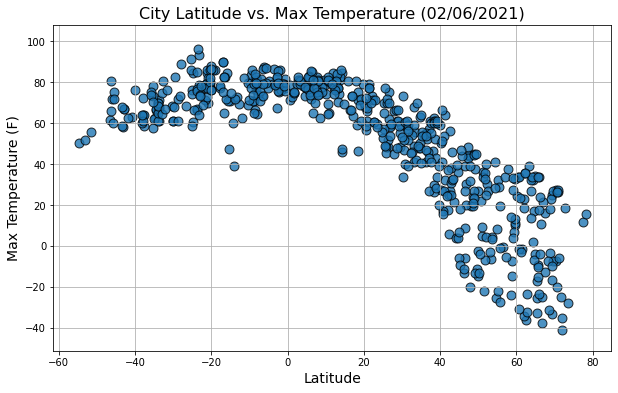

<Figure size 432x288 with 0 Axes>

In [11]:
# Function to Plot Scatter 
def Scatterplot(x,y,title,ylabel,i,j):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=.8, s=80, edgecolor="black")
    plt.grid()
    plt.xlabel("Latitude" , fontsize = 14)
    plt.ylabel(ylabel , fontsize = 14)
    plt.title(title , fontsize = 16)
    plt.ylim(min(y)-i,max(y)+j)
    plt.show()
    plt.tight_layout()
    
    

#Set current date for the title
date = time.strftime("%m/%d/%Y")   

#Set X-Axis and Y-axis for plotting    
x_axis = clean_city_data["Lat"]
y_axis_temp = clean_city_data["Max Temp(F)"]

#Set Title
title = f"City Latitude vs. Max Temperature ({date})"
y_label_T = "Max Temperature (F)"

#Set ylim minimum
ymin = 10
ymax = 12

#Call the function for plotting
scatterplot_Lat_Temp =  Scatterplot(x_axis,y_axis_temp ,title,y_label_T,ymin,ymax)   

#Save as png file
plt.savefig("../Images/CityLatVsTemp.png")

## Latitude vs. Humidity Plot

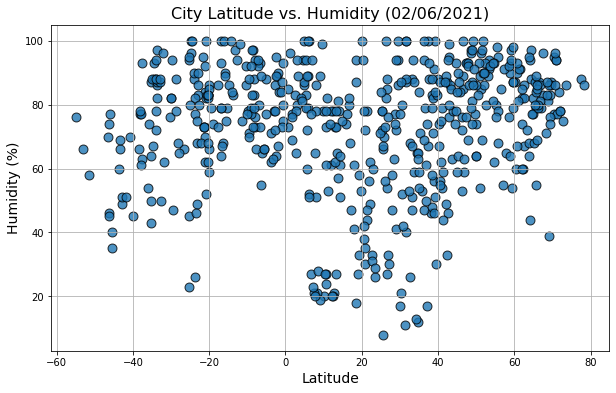

<Figure size 432x288 with 0 Axes>

In [12]:
#Since X-Axis is already set, get Y-axis values for plotting  
y_axis_Humidity = clean_city_data["Humidity"]

#Set Title and Label
title_H = f"City Latitude vs. Humidity ({date})"
y_label_H = "Humidity (%)"

#Set ylim minimum
ymin_H = 5
ymax_H = 5

#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_Humidity , title_H, y_label_H, ymin_H, ymax_H)  

#Save as png file
plt.savefig("../Images/CityLatVsHumidity.png")

## Latitude vs. Cloudiness Plot

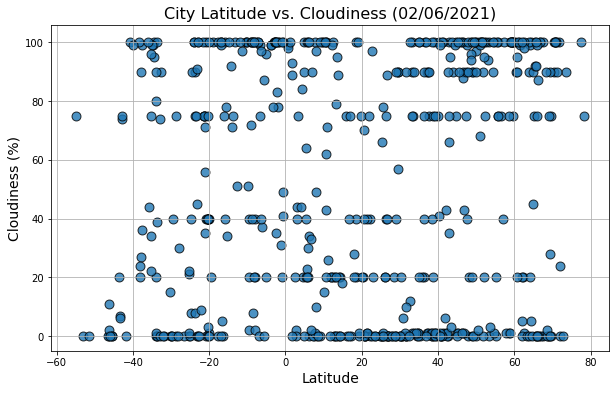

<Figure size 432x288 with 0 Axes>

In [13]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_cloud = clean_city_data["Cloudiness"]

#Set Title and Label
title_C = f"City Latitude vs. Cloudiness ({date})"
y_label_C= "Cloudiness (%)"

#Set ylim minimum
ymin_C = 5
ymax_C = 6

#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_cloud , title_C, y_label_C, ymin_C, ymax_C)  

#Save as png file
plt.savefig("../Images/CityLatVsCloudiness.png")

## Latitude vs. Wind Speed Plot

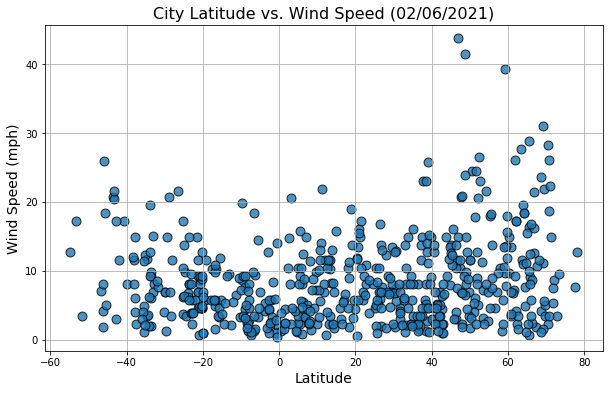

<Figure size 432x288 with 0 Axes>

In [14]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_wind = clean_city_data["Wind Speed"]

#Set Title and Label
title_W = f"City Latitude vs. Wind Speed ({date})"
y_label_W= "Wind Speed (mph)"

#Set ylim minimum
ymin_W = 2
ymax_W = 2

#Call the function for plotting
scatterplot_Lat_Wind =  Scatterplot(x_axis, y_axis_wind , title_W, y_label_W, ymin_W, ymax_W)  

#Save as png file
plt.savefig("../Images/CityLatVsWindSpeed.png")

## Linear Regression

##### Note:Creating a dataset for Northern Hemisphere

In [15]:
#Find data for Northern Hemisphere
Northern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]>=0 , :]

#Northern Hemisphere Temperature data points
Northern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.40,49,40,6.91,US,1612660218
1,Urozhaynoye,44.7883,44.9228,36.27,93,100,7.92,RU,1612660733
3,Gravelbourg,49.8834,-106.5512,-14.80,64,97,6.91,CA,1612660733
9,Provideniya,64.3833,-173.3000,1.76,88,5,4.85,RU,1612660288
12,Bethel,41.3712,-73.4140,32.00,59,1,5.14,US,1612660282
...,...,...,...,...,...,...,...,...,...
557,Gogrial,8.5332,28.1004,62.62,28,0,7.25,SS,1612660854
558,Prince Rupert,54.3161,-130.3201,41.00,81,90,8.05,CA,1612660598
559,Portland,45.5234,-122.6762,46.99,87,90,16.11,US,1612660647
560,Ozieri,40.5860,9.0012,66.20,55,0,13.80,IT,1612660855


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

##### Function to calculate Linar regression values:

In [16]:
#Calculate and Run Linear Regression 
def linarequation(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return rvalue , line_eq , regress_values

##### Note: Function to plot scatter with LR equation

In [17]:
#Scatter plot with LR equation
#Arguments ymin and ymax sets y limit and lmin and lmax set LR annotation on the plot
def LR_Scatterplot(x, y, reg_value,line_eq, title, ylabel, ymin, ymax, lmin, lmax):
    plt.figure(figsize=(10,6))
    plt.scatter(x,y , alpha=.8, s=80, edgecolor="black")
    plt.plot(x,reg_value,"r-")
    plt.annotate(line_eq,(lmin,max(y)+lmax),fontsize=20,color="red")
    plt.title(title, fontsize = 16 , color ='black')
    plt.ylim(min(y) -ymin, max(y) +ymax)
    plt.xlabel("Latitude" , fontsize = 14 ,color ='black')
    plt.ylabel(ylabel , fontsize = 14 , color ='black')
    plt.show()
    plt.tight_layout()

In [18]:
# Find X_Axis and Y_Axis values
x_axis_northern = Northern_hemisphere_df['Lat']
y_axis_northern = Northern_hemisphere_df['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_NT , line_eq_NT, regress_values_NT= linarequation(x_axis_northern,y_axis_northern)

#Print values to display
print(f'Linear R Equation : {line_eq_NT}')
print(f"The r-value is: {round(rvalue_NT**2,2)}")

Linear R Equation : y = -1.34x + 90.72
The r-value is: 0.72


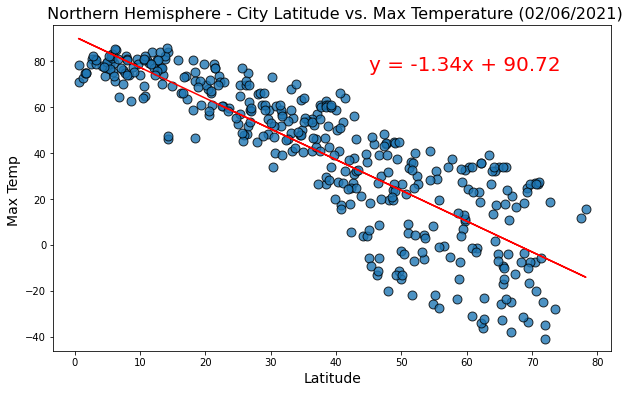

<Figure size 432x288 with 0 Axes>

In [19]:
#plotting scatter Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#Set Title and Label for the pLot    
title_NT = f" Northern Hemisphere - City Latitude vs. Max Temperature ({date})"
ylabel_NT = "Max Temp "

#Set ylim minimum
ymin_NT = 5
ymax_NT = 10

#set annotation limit
lmin_NT =45
lmax_NT =-10

#Call the function for plotting
scatterplot_NH_Temp =  LR_Scatterplot(x_axis_northern, 
                                      y_axis_northern , 
                                      regress_values_NT, 
                                      line_eq_NT,
                                      title_NT, 
                                      ylabel_NT, 
                                      ymin_NT, ymax_NT,
                                      lmin_NT,lmax_NT)  

#Save as png file
plt.savefig("../Images/NorthHem_LatVsTemp_LR.png")

#### Analysis : The r-value: 0.75 
         - Shows that there is a strong positive correlation between Temperature and Latitude on the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

##### Note:Creating a dataset for Southern Hemisphere

In [20]:
#Find data for Southern Hemisphere
Southern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]<=0 , :]

#Southern Hemisphere Temperature data points
Southern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
2,Ushuaia,-54.8000,-68.3000,50.00,76,75,12.66,AR,1612660266
4,Porto Walter,-8.2686,-72.7439,76.17,88,100,1.25,BR,1612660733
5,Vaini,-21.2000,-175.2000,84.20,84,75,9.22,TO,1612660273
6,Castro,-24.7911,-50.0119,60.30,96,8,9.78,BR,1612660217
7,Mossamedes,-15.1961,12.1522,70.54,79,34,5.73,AO,1612660205
...,...,...,...,...,...,...,...,...,...
547,Ahipara,-35.1667,173.1667,70.07,64,96,2.13,NZ,1612660310
556,Buala,-8.1450,159.5921,79.48,79,100,7.02,SB,1612660296
562,Dedza,-14.3779,34.3332,60.15,100,92,2.28,MW,1612660855
563,Macusani,-14.0833,-70.4333,38.98,84,71,5.35,PE,1612660855


In [21]:
# Find X_Axis and Y_Axis values
x_axis_South = Southern_hemisphere_df['Lat']
y_axis_South = Southern_hemisphere_df['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_ST , line_eq_ST ,regress_values_ST = linarequation(x_axis_South,y_axis_South)

#Print values to display
print(f'Linear R Equation : {line_eq_ST}')
print(f"The r-value is: {round(rvalue_ST**2,2)}")

Linear R Equation : y = 0.33x + 80.82
The r-value is: 0.23


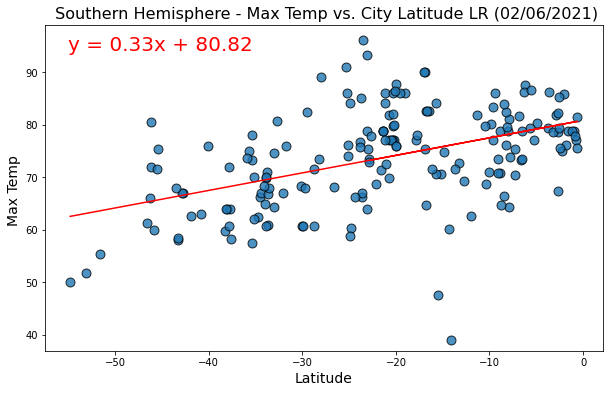

<Figure size 432x288 with 0 Axes>

In [22]:
#plotting scatter Southern Hemisphere - Max Temp vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_ST = f" Southern Hemisphere - Max Temp vs. City Latitude LR ({date})"
ylabel_ST = "Max Temp "

#Set ylim minimum
ymin_ST = 2
ymax_ST = 3

#set annotation limit
lmin_ST =-55
lmax_ST =-2

#Call the function for plotting
scatterplot_SH_Temp =  LR_Scatterplot(x_axis_South, 
                                      y_axis_South , 
                                      regress_values_ST, 
                                      line_eq_ST,
                                      title_ST, 
                                      ylabel_ST, 
                                      ymin_ST, ymax_ST,
                                      lmin_ST , lmax_ST )  

#Save as png file
plt.savefig("../Images/southHem_LatVsTemp_LR.png")

#### Analysis : The r-value: 0.41
                   - Shows that there is a moderate positive correlation between Temperature and Latitude on the 
                     Southern Hemisphere
                   - LR model is accounting for 41% of the data which can be seen in the plot.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [35]:
# Find X_Axis and Y_Axis values
x_axis_NH_Humid = Northern_hemisphere_df['Lat']
y_axis_NH_humid = Northern_hemisphere_df['Humidity']

#Call function to calculate Line equation and R vlaue
rvalue_N_Humid , line_eq_N_Humid, regress_values_N_Humid= linarequation(x_axis_NH_Humid,y_axis_NH_humid)

#Print values to display
print(f'Linear R Equation : {line_eq_N_Humid}')
print(f"The r-value is: {round(rvalue_N_Humid**2,3)}")

Linear R Equation : y = 0.33x + 59.32
The r-value is: 0.101


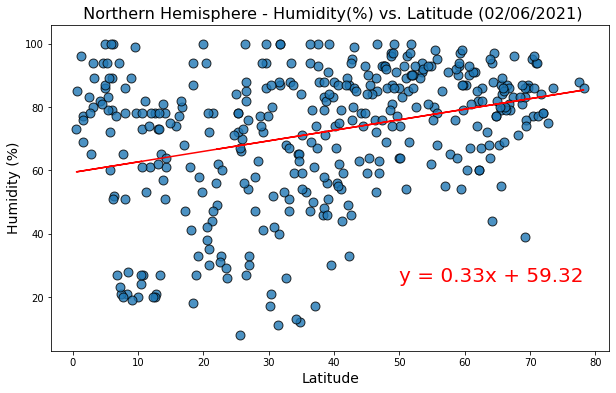

<Figure size 432x288 with 0 Axes>

In [24]:
#plotting scatter Northern Hemisphere - Humidity (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_NHumid = f" Northern Hemisphere - Humidity(%) vs. Latitude ({date})"
ylabel_NHumid = "Humidity (%)"

#Set ylim minimum
ymin_NHumid = 5
ymax_NHumid = 6

#set annotation limit
lmin_NHumid =50
lmax_NHumid =-75

#Call the function for plotting
scatterplot_N_Humid =  LR_Scatterplot(x_axis_NH_Humid, 
                                      y_axis_NH_humid , 
                                      regress_values_N_Humid, 
                                      line_eq_N_Humid,
                                      title_NHumid, 
                                      ylabel_NHumid, 
                                      ymin_NHumid, ymax_NHumid,
                                      lmin_NHumid , lmax_NHumid )
#Save as png file
plt.savefig("../Images/NorthHem_LatVsHumidity_LR.png")

#### Analysis : The r-value: 0.18 
                    - Shows that there is a very weak correlation between Humidity and Latitude on the Northerns 
                      Hemisphere accounting for 18% of the data.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
# Find X_Axis and Y_Axis values
x_axis_SH_Humid = Southern_hemisphere_df['Lat']
y_axis_SH_humid = Southern_hemisphere_df['Humidity']

#Call function to calculate Line equation and R vlaue
rvalue_S_Humid , line_eq_S_Humid, regress_values_S_Humid= linarequation(x_axis_SH_Humid, y_axis_SH_humid)

#Print values to display
print(f'Linear R Equation : {line_eq_S_Humid}')
print(f"The r-value is: {round(rvalue_S_Humid**2,2)}")

Linear R Equation : y = 0.37x + 84.49
The r-value is: 0.11


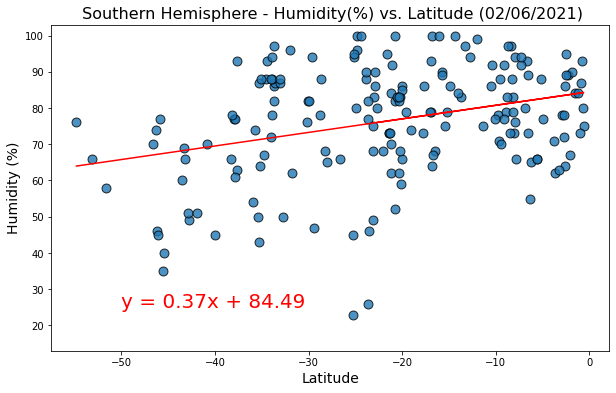

<Figure size 432x288 with 0 Axes>

In [26]:
#plotting scatter Southern Hemisphere - Humidity (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_SHumid = f" Southern Hemisphere - Humidity(%) vs. Latitude ({date})"
ylabel_SHumid = "Humidity (%)"

#Set ylim minimum
ymin_SHumid = 10
ymax_SHumid = 3

#set annotation limit
lmin_SHumid =-50
lmax_SHumid =-75

#Call the function for plotting
scatterplot_S_Humid =  LR_Scatterplot(x_axis_SH_Humid, 
                                      y_axis_SH_humid , 
                                      regress_values_S_Humid, 
                                      line_eq_S_Humid,
                                      title_SHumid, 
                                      ylabel_SHumid, 
                                      ymin_SHumid, ymax_SHumid,
                                      lmin_SHumid , lmax_SHumid )
#Save as png file
plt.savefig("../Images/southHem_LatVsHumidity_LR.png")

#### Analysis : The r-value: 0.01 - Shows that there is a very weak or almost no correlation between Humidity and Latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
# Find X_Axis and Y_Axis values
x_axis_NH_cloud = Northern_hemisphere_df['Lat']
y_axis_NH_cloud = Northern_hemisphere_df['Cloudiness']

#Call function to calculate Line equation and R vlaue
rvalue_N_cloud , line_eq_N_cloud, regress_values_N_cloud= linarequation(x_axis_NH_cloud,y_axis_NH_cloud)

#Print values to display
print(f'Linear R Equation : {line_eq_N_cloud}')
print(f"The r-value is: {round(rvalue_N_cloud**2,2)}")

Linear R Equation : y = 0.44x + 31.17
The r-value is: 0.04


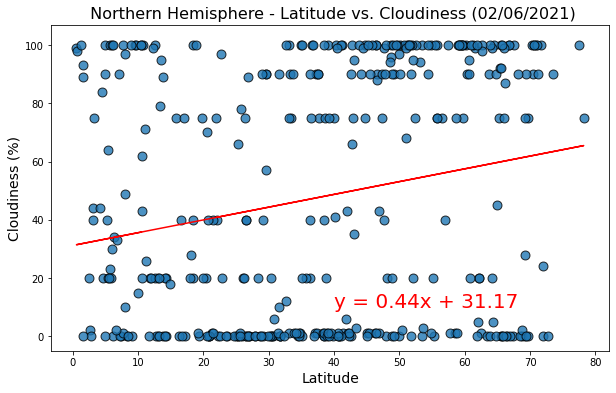

<Figure size 432x288 with 0 Axes>

In [28]:
#plotting scatter Northern Hemisphere - Cloudiness (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Ncloud = f" Northern Hemisphere - Latitude vs. Cloudiness ({date})"
ylabel_Ncloud = "Cloudiness (%)"

#Set ylim minimum
ymin_Ncloud = 5
ymax_Ncloud = 7

#set annotation limit
lmin_Ncloud = 40
lmax_Ncloud =-90

#Call the function for plotting
scatterplot_N_cloud =  LR_Scatterplot(x_axis_NH_cloud, 
                                      y_axis_NH_cloud , 
                                      regress_values_N_cloud, 
                                      line_eq_N_cloud,
                                      title_Ncloud, 
                                      ylabel_Ncloud, 
                                      ymin_Ncloud, ymax_Ncloud,
                                      lmin_Ncloud , lmax_Ncloud )
#Save as png file
plt.savefig("../Images/NorthHem_LatVsCloudiness_LR.png")

#### Analysis : The r-value: 0.08
                   - Shows that there is a very weak correlation between Cloudiness and Latitude acoounting for 8% 
                     of the data

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
# Find X_Axis and Y_Axis values
x_axis_SH_cloud = Southern_hemisphere_df['Lat']
y_axis_SH_cloud = Southern_hemisphere_df['Cloudiness']

#Call function to calculate Line equation and R vlaue
rvalue_S_cloud , line_eq_S_cloud, regress_values_S_cloud = linarequation(x_axis_SH_cloud, y_axis_SH_cloud)

#Print values to display
print(f'Linear R Equation : {line_eq_S_cloud}')
print(f"The r-value is: {round(rvalue_S_cloud**2,2)}")

Linear R Equation : y = 1.01x + 75.22
The r-value is: 0.11


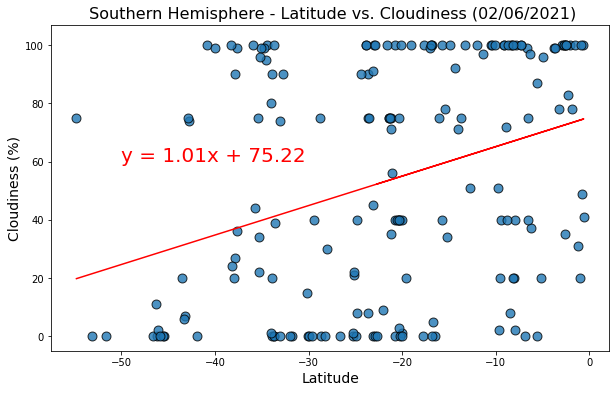

<Figure size 432x288 with 0 Axes>

In [30]:
#plotting scatter Southern Hemisphere - Cloudiness (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Scloud = f" Southern Hemisphere - Latitude vs. Cloudiness ({date})"
ylabel_Scloud = "Cloudiness (%)"

#Set ylim minimum
ymin_Scloud = 5
ymax_Scloud = 7

#set annotation limit
lmin_Scloud = -50
lmax_Scloud =-40

#Call the function for plotting
scatterplot_S_cloud =  LR_Scatterplot(x_axis_SH_cloud, 
                                      y_axis_SH_cloud , 
                                      regress_values_S_cloud, 
                                      line_eq_S_cloud,
                                      title_Scloud, 
                                      ylabel_Scloud, 
                                      ymin_Scloud, ymax_Scloud,
                                      lmin_Scloud , lmax_Scloud )
#Save as png file
plt.savefig("../Images/southHem_LatVsCloudiness_LR.png")

#### Analysis : The r-value: 0.09 
                  - Shows that there is a very weak correlation between Cloudiness and Latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [31]:
# Find X_Axis and Y_Axis values
x_axis_NH_wind = Northern_hemisphere_df['Lat']
y_axis_NH_wind= Northern_hemisphere_df['Wind Speed']

#Call function to calculate Line equation and R vlaue
rvalue_N_wind , line_eq_N_wind, regress_values_N_wind= linarequation(x_axis_NH_wind,y_axis_NH_wind)

#Print values to display
print(f'Linear R Equation : {line_eq_N_wind}')
print(f"The r-value is: {round(rvalue_N_wind**2,4)}")

Linear R Equation : y = 0.08x + 5.83
The r-value is: 0.0594


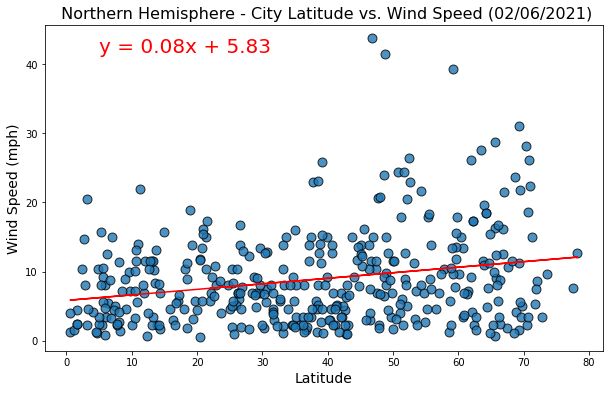

<Figure size 432x288 with 0 Axes>

In [32]:
#plotting scatter Northern Hemisphere - Wind Speed  (mph) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Nwind = f" Northern Hemisphere - City Latitude vs. Wind Speed ({date})"
ylabel_Nwind = "Wind Speed (mph)"

#Set ylim minimum
ymin_Nwind = 2
ymax_Nwind = 2

#set annotation limit
lmin_Nwind = 5
lmax_Nwind =-2

#Call the function for plotting
scatterplot_N_wind =  LR_Scatterplot(x_axis_NH_wind, 
                                      y_axis_NH_wind , 
                                      regress_values_N_wind, 
                                      line_eq_N_wind,
                                      title_Nwind, 
                                      ylabel_Nwind, 
                                      ymin_Nwind, ymax_Nwind,
                                      lmin_Nwind , lmax_Nwind )
#Save as png file
plt.savefig("../Images/NorthHem_LatVsWindSpeed_LR.png")

#### Analysis : The r-value: 0.0155 - Shows that ther is a very weak or almost no correlation between windspeed and Latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
# Find X_Axis and Y_Axis values
x_axis_SH_Wind = Southern_hemisphere_df['Lat']
y_axis_SH_Wind = Southern_hemisphere_df['Wind Speed']

#Call function to calculate Line equation and R vlaue
rvalue_S_Wind , line_eq_S_Wind, regress_values_S_Wind = linarequation(x_axis_SH_Wind, y_axis_SH_Wind)

#Print values to display
print(f'Linear R Equation : {line_eq_S_Wind}')
print(f"The r-value is: {round(rvalue_S_Wind**2,3)}")

Linear R Equation : y = -0.14x + 4.42
The r-value is: 0.126


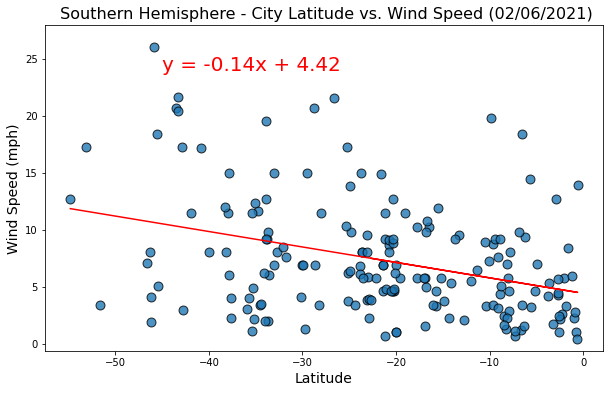

<Figure size 432x288 with 0 Axes>

In [34]:
#plotting scatter Southern Hemisphere - Wind Speed  (mph) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Swind = f" Southern Hemisphere - City Latitude vs. Wind Speed ({date})"
ylabel_Swind = "Wind Speed (mph)"

#Set ylim minimum 
ymin_Swind = 1
ymax_Swind = 2

#set annotation limit to display LR line
lmin_Swind = -45
lmax_Swind =-2

#Call the function for plotting
scatterplot_S_wind =  LR_Scatterplot(x_axis_SH_Wind, 
                                      y_axis_SH_Wind , 
                                      regress_values_S_Wind, 
                                      line_eq_S_Wind,
                                      title_Swind, 
                                      ylabel_Swind, 
                                      ymin_Swind, ymax_Swind,
                                      lmin_Swind , lmax_Swind )
#Save as png file
plt.savefig("../Images/SouthHem_LatVsWindSpeed_LR.png")

#### Analysis : The r-value : 0.01 - Shows that there is correlation between latitude and windspeed.